$\underline{\text{Machine Learning 2}}\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad$ Grigorian Artem 204
## Homework 2

In [1]:
from torch.utils.data import DataLoader, TensorDataset, Subset
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
import math
import time
import multiprocessing

from datasets import load_dataset

import random
import os
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

import timm

from PIL import Image

C:\Users\artem\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset = load_dataset("Bingsu/Cat_and_Dog")
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'labels'],
        num_rows: 8000
    })
    test: Dataset({
        features: ['image', 'labels'],
        num_rows: 2000
    })
})

In [3]:
dataset["train"].features

{'image': Image(decode=True, id=None),
 'labels': ClassLabel(names=['cat', 'dog'], id=None)}

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=379x407 at 0x13B47F20EB0>, 'labels': 0}


 Its literally me, when I see homework on ML


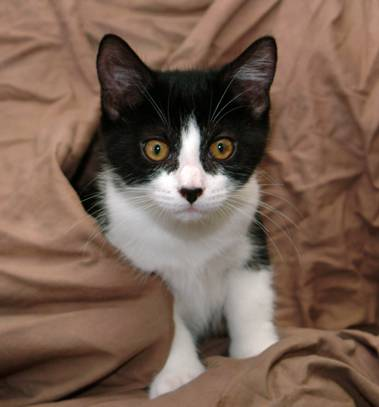

In [17]:
example = dataset["train"][5]
print(example)
print('\n')
print("\033[37m\033[40m {}".format('Its literally me, when I see homework on ML'))
example['image']

In [15]:
for i in range(len(dataset["train"])):
    print(dataset["train"][i]['image'].size)

(300, 280)
(489, 499)
(403, 499)
(150, 149)
(336, 499)
(379, 407)
(259, 269)
(499, 375)
(500, 333)
(499, 375)
(500, 374)
(328, 368)
(353, 400)
(296, 200)
(500, 374)
(500, 273)
(500, 374)
(500, 480)
(344, 335)
(499, 377)
(288, 287)
(238, 240)
(499, 375)
(500, 374)
(349, 343)
(271, 360)
(358, 499)
(500, 472)
(349, 315)
(484, 445)
(500, 374)
(475, 315)
(437, 396)
(500, 323)
(499, 375)
(500, 386)
(500, 374)
(499, 375)
(500, 331)
(335, 448)
(229, 254)
(500, 374)
(500, 374)
(500, 374)
(499, 365)
(374, 499)
(253, 399)
(462, 431)
(482, 465)
(349, 262)
(500, 374)
(500, 374)
(499, 445)
(499, 375)
(382, 500)
(350, 500)
(500, 374)
(215, 174)
(429, 259)
(499, 375)
(399, 360)
(500, 374)
(311, 310)
(500, 374)
(500, 374)
(375, 499)
(284, 341)
(499, 375)
(400, 374)
(499, 375)
(329, 245)
(479, 360)
(499, 300)
(240, 158)
(500, 373)
(300, 224)
(499, 375)
(407, 398)
(279, 226)
(499, 350)
(500, 374)
(500, 399)
(419, 442)
(199, 250)
(334, 327)
(499, 355)
(300, 224)
(500, 374)
(500, 374)
(305, 321)
(499, 332)

(322, 499)
(324, 333)
(373, 500)
(499, 375)
(500, 364)
(206, 239)
(367, 477)
(400, 299)
(381, 479)
(321, 448)
(500, 374)
(312, 280)
(278, 319)
(329, 314)
(319, 240)
(500, 374)
(165, 199)
(499, 375)
(375, 499)
(350, 261)
(266, 270)
(499, 334)
(239, 157)
(473, 499)
(250, 301)
(312, 322)
(215, 500)
(380, 392)
(399, 400)
(99, 110)
(240, 239)
(499, 375)
(480, 359)
(493, 500)
(374, 500)
(240, 258)
(499, 375)
(385, 500)
(332, 311)
(239, 200)
(229, 448)
(249, 234)
(299, 375)
(342, 226)
(500, 429)
(500, 374)
(319, 240)
(349, 262)
(500, 374)
(500, 413)
(500, 375)
(320, 239)
(375, 499)
(499, 276)
(420, 499)
(300, 226)
(390, 317)
(482, 500)
(500, 374)
(243, 161)
(448, 317)
(400, 298)
(333, 499)
(219, 165)
(500, 279)
(500, 374)
(319, 364)
(286, 287)
(500, 374)
(304, 198)
(499, 375)
(376, 359)
(499, 375)
(500, 350)
(476, 498)
(499, 375)
(499, 373)
(500, 350)
(500, 415)
(189, 190)
(500, 377)
(499, 375)
(388, 500)
(499, 421)
(499, 436)
(374, 500)
(374, 500)
(349, 297)
(459, 347)
(500, 372)
(500, 376)


(500, 424)
(320, 223)
(336, 363)
(480, 336)
(287, 216)
(289, 389)
(352, 379)
(439, 441)
(181, 216)
(499, 375)
(500, 395)
(499, 375)
(496, 350)
(499, 387)
(376, 499)
(500, 374)
(235, 350)
(139, 109)
(499, 375)
(475, 345)
(499, 375)
(499, 375)
(500, 374)
(499, 400)
(500, 374)
(500, 332)
(500, 374)
(249, 152)
(499, 357)
(245, 299)
(500, 331)
(499, 375)
(499, 480)
(500, 374)
(333, 499)
(499, 375)
(500, 374)
(59, 41)
(499, 318)
(415, 499)
(499, 375)
(259, 187)
(461, 499)
(352, 290)
(300, 200)
(452, 335)
(500, 374)
(442, 274)
(500, 374)
(227, 240)
(400, 308)
(499, 397)
(499, 371)
(373, 469)
(227, 182)
(344, 500)
(500, 384)
(334, 400)
(499, 375)
(368, 500)
(499, 375)
(499, 413)
(338, 499)
(500, 374)
(500, 286)
(500, 374)
(499, 375)
(499, 424)
(499, 375)
(426, 500)
(338, 449)
(500, 374)
(499, 375)
(500, 374)
(357, 361)
(500, 374)
(500, 333)
(384, 427)
(319, 240)
(423, 480)
(288, 431)
(500, 374)
(499, 320)
(319, 240)
(500, 374)
(485, 441)
(459, 500)
(499, 499)
(320, 228)
(499, 332)
(364, 399)
(

(212, 112)
(300, 198)
(499, 332)
(499, 357)
(499, 390)
(423, 288)
(499, 375)
(499, 319)
(500, 374)
(344, 500)
(487, 500)
(500, 415)
(499, 375)
(229, 175)
(167, 124)
(432, 287)
(400, 299)
(399, 366)
(352, 416)
(500, 374)
(499, 375)
(431, 181)
(499, 454)
(319, 240)
(499, 375)
(500, 376)
(479, 360)
(499, 375)
(374, 500)
(499, 440)
(499, 375)
(371, 352)
(499, 419)
(299, 288)
(500, 374)
(499, 473)
(500, 374)
(499, 279)
(446, 500)
(350, 345)
(210, 157)
(499, 375)
(340, 473)
(499, 470)
(216, 217)
(415, 269)
(499, 375)
(400, 299)
(400, 467)
(493, 470)
(412, 275)
(337, 500)
(337, 500)
(154, 110)
(499, 427)
(500, 374)
(499, 375)
(249, 250)
(499, 343)
(174, 246)
(500, 374)
(500, 439)
(420, 388)
(499, 375)
(249, 231)
(291, 443)
(500, 415)
(197, 209)
(499, 384)
(499, 323)
(168, 140)
(352, 499)
(239, 151)
(306, 409)
(300, 224)
(500, 374)
(440, 387)
(161, 162)
(500, 374)
(302, 499)
(348, 392)
(500, 374)
(499, 375)
(499, 375)
(499, 375)
(300, 324)
(282, 283)
(500, 374)
(499, 375)
(399, 315)
(499, 375)

(500, 359)
(500, 374)
(499, 332)
(398, 499)
(500, 374)
(499, 374)
(375, 499)
(500, 317)
(500, 374)
(499, 375)
(500, 374)
(500, 374)
(374, 500)
(449, 338)
(500, 374)
(500, 374)
(371, 500)
(200, 181)
(500, 481)
(199, 280)
(195, 145)
(200, 348)
(499, 375)
(499, 472)
(179, 200)
(500, 374)
(499, 333)
(268, 500)
(447, 458)
(479, 360)
(499, 344)
(499, 426)
(449, 329)
(491, 500)
(430, 499)
(375, 499)
(499, 375)
(500, 426)
(408, 499)
(499, 500)
(499, 375)
(248, 320)
(375, 271)
(500, 374)
(444, 229)
(499, 374)
(500, 332)
(489, 500)
(327, 247)
(499, 313)
(500, 331)
(310, 500)
(499, 375)
(402, 499)
(293, 325)
(499, 375)
(499, 375)
(500, 332)
(404, 471)
(500, 327)
(349, 262)
(300, 292)
(497, 479)
(500, 374)
(499, 333)
(500, 386)
(499, 375)
(487, 499)
(332, 500)
(499, 375)
(483, 500)
(300, 224)
(500, 397)
(499, 375)
(500, 374)
(232, 270)
(500, 374)
(500, 374)
(314, 317)
(500, 374)
(500, 407)
(305, 310)
(288, 431)
(374, 500)
(500, 314)
(375, 499)
(254, 350)
(480, 359)
(499, 333)
(279, 499)
(499, 375)

(327, 499)
(269, 292)
(500, 397)
(499, 375)
(347, 500)
(200, 199)
(220, 166)
(235, 333)
(500, 355)
(499, 500)
(323, 241)
(500, 332)
(500, 479)
(440, 500)
(360, 269)
(300, 199)
(160, 106)
(217, 299)
(499, 429)
(320, 500)
(275, 335)
(194, 298)
(500, 374)
(349, 318)
(499, 373)
(426, 401)
(390, 499)
(199, 189)
(199, 150)
(432, 368)
(424, 500)
(350, 261)
(332, 500)
(100, 99)
(249, 217)
(499, 433)
(499, 375)
(499, 375)
(499, 332)
(304, 375)
(363, 490)
(500, 497)
(412, 479)
(448, 335)
(499, 375)
(479, 499)
(499, 375)
(499, 375)
(500, 465)
(499, 375)
(200, 116)
(500, 374)
(379, 500)
(499, 375)
(236, 499)
(500, 374)
(270, 400)
(170, 221)
(394, 402)
(500, 328)
(500, 488)
(200, 155)
(299, 288)
(499, 375)
(321, 500)
(375, 499)
(499, 375)
(135, 179)
(500, 374)
(405, 500)
(500, 374)
(336, 447)
(349, 290)
(499, 344)
(445, 334)
(374, 500)
(400, 496)
(250, 345)
(341, 500)
(499, 458)
(399, 465)
(499, 375)
(350, 417)
(499, 375)
(499, 460)
(499, 333)
(241, 333)
(500, 337)
(374, 454)
(500, 374)
(259, 480)


(358, 499)
(499, 375)
(375, 499)
(260, 379)
(272, 335)
(459, 500)
(400, 354)
(412, 499)
(500, 374)
(499, 374)
(250, 364)
(499, 375)
(398, 499)
(499, 385)
(319, 240)
(332, 500)
(354, 354)
(432, 254)
(241, 319)
(500, 376)
(466, 499)
(500, 374)
(374, 500)
(417, 499)
(350, 447)
(481, 311)
(374, 500)
(317, 500)
(499, 332)
(149, 197)
(118, 198)
(126, 144)
(302, 294)
(500, 373)
(415, 499)
(500, 332)
(238, 190)
(499, 375)
(500, 333)
(414, 500)
(449, 300)
(323, 500)
(240, 469)
(420, 499)
(399, 499)
(499, 340)
(500, 374)
(360, 287)
(500, 374)
(258, 187)
(222, 210)
(212, 500)
(429, 405)
(185, 219)
(480, 417)
(157, 181)
(261, 241)
(267, 399)
(422, 298)
(499, 301)
(374, 500)
(499, 455)
(118, 200)
(500, 374)
(393, 392)
(152, 199)
(332, 479)
(214, 270)
(500, 396)
(500, 332)
(399, 426)
(141, 174)
(500, 373)
(499, 375)
(360, 268)
(305, 500)
(375, 499)
(400, 288)
(490, 500)
(337, 399)
(424, 499)
(450, 500)
(499, 375)
(480, 351)
(289, 420)
(499, 375)
(267, 326)
(167, 200)
(250, 249)
(500, 437)
(499, 375)

(249, 201)
(375, 299)
(499, 350)
(499, 375)
(380, 444)
(500, 374)
(499, 375)
(500, 375)
(500, 374)
(401, 500)
(300, 399)
(335, 448)
(403, 500)
(499, 377)
(456, 500)
(249, 248)
(499, 375)
(299, 171)
(375, 499)
(500, 374)
(328, 500)
(499, 334)
(500, 374)
(199, 172)
(499, 386)
(499, 375)
(499, 470)
(399, 476)
(499, 375)
(499, 375)
(500, 374)
(359, 210)
(500, 418)
(374, 500)
(499, 457)
(310, 368)
(399, 300)
(423, 398)
(400, 266)
(360, 269)
(500, 374)
(105, 94)
(499, 375)
(215, 499)
(257, 260)
(499, 375)
(479, 365)
(373, 499)
(319, 240)
(386, 342)
(339, 499)
(500, 374)
(500, 374)
(500, 374)
(499, 297)
(297, 310)
(499, 402)
(500, 475)
(288, 296)
(500, 374)
(255, 212)
(384, 349)
(143, 150)
(500, 374)
(405, 499)
(337, 474)
(499, 375)
(499, 375)
(380, 500)
(312, 499)
(400, 300)
(500, 374)
(199, 469)
(500, 374)
(179, 209)
(500, 374)
(499, 394)
(300, 255)
(375, 499)
(310, 246)
(237, 235)
(500, 374)
(392, 255)
(336, 411)
(320, 239)
(436, 500)
(224, 221)
(300, 154)
(500, 499)
(251, 299)
(500, 374)


(413, 499)
(499, 333)
(305, 423)
(401, 479)
(500, 422)
(402, 500)
(500, 374)
(471, 445)
(245, 184)
(499, 375)
(500, 374)
(338, 499)
(372, 499)
(499, 465)
(500, 291)
(219, 296)
(471, 479)
(499, 375)
(333, 500)
(461, 499)
(320, 239)
(500, 398)
(500, 374)
(129, 130)
(288, 272)
(253, 329)
(349, 263)
(500, 387)
(404, 231)
(500, 351)
(500, 374)
(499, 375)
(499, 458)
(200, 149)
(500, 374)
(499, 395)
(440, 430)
(299, 227)
(499, 333)
(350, 250)
(264, 356)
(318, 304)
(366, 392)
(293, 219)
(500, 484)
(323, 438)
(500, 374)
(287, 360)
(500, 374)
(500, 359)
(500, 499)
(200, 296)
(299, 315)
(329, 399)
(500, 439)
(490, 499)
(500, 449)
(499, 431)
(445, 480)
(165, 222)
(359, 360)
(200, 253)
(252, 249)
(155, 200)
(500, 369)
(244, 183)
(316, 500)
(360, 256)
(330, 414)
(500, 380)
(150, 112)
(500, 374)
(499, 375)
(499, 375)
(359, 251)
(500, 374)
(195, 287)
(500, 374)
(462, 499)
(500, 374)
(499, 492)
(499, 375)
(499, 375)
(264, 499)
(499, 375)
(499, 375)
(500, 331)
(500, 374)
(500, 374)
(499, 351)
(500, 455)

(499, 375)
(359, 395)
(500, 442)
(324, 280)
(344, 499)
(499, 375)
(499, 375)
(499, 398)
(350, 456)
(219, 375)
(349, 263)
(320, 239)
(390, 399)
(414, 499)
(300, 299)
(319, 240)
(250, 249)
(253, 287)
(456, 479)
(499, 375)
(239, 262)
(499, 375)
(399, 500)
(499, 375)
(400, 279)
(413, 500)
(446, 450)
(288, 370)
(424, 335)
(475, 457)
(434, 499)
(499, 375)
(193, 301)
(291, 387)
(500, 374)
(499, 375)
(423, 482)
(356, 500)
(500, 374)
(389, 499)
(391, 411)
(500, 382)
(500, 387)
(431, 287)
(500, 374)
(324, 197)
(449, 500)
(319, 240)
(500, 443)
(500, 374)
(257, 288)
(364, 499)
(500, 366)
(499, 383)
(499, 500)
(499, 375)
(313, 329)
(499, 375)
(450, 307)
(500, 444)
(499, 375)
(377, 335)
(300, 270)
(500, 343)
(499, 255)
(500, 374)
(349, 373)
(319, 273)
(477, 500)
(498, 500)
(500, 374)
(500, 499)
(398, 461)
(376, 285)
(499, 360)
(317, 447)
(282, 270)
(249, 236)
(500, 378)
(499, 385)
(359, 270)
(444, 370)
(393, 500)
(500, 374)
(500, 332)
(500, 374)
(499, 375)
(499, 375)
(438, 336)
(487, 456)
(363, 500)

In [5]:
train_ds = dataset["train"]
train_ds

Dataset({
    features: ['image', 'labels'],
    num_rows: 8000
})

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

train_data, val_data = train_test_split(train_ds, test_size=0.25, random_state=42)

# Load and preprocess the dataset (MNIST as an example)
train_array_l = np.array(train_data["labels"])
val_array_l = np.array(val_data["labels"])

In [8]:
train_array_im = []

for i in range(len(train_data["image"])):
    image = train_data["image"][i].resize((350, 350))
    image_array = np.array(image)
    train_array_im.append(image_array)
print(len(train_array_im))

6000


In [9]:
val_array_im = []

for i in range(len(val_data["image"])):
    image = val_data["image"][i].resize((350, 350))
    image_array = np.array(image)
    val_array_im.append(image_array)
print(len(val_array_im))

2000


In [10]:
train_images = np.array(train_array_im)
test_images = np.array(val_array_im)

# One-hot encode the labels
train_labels = to_categorical(train_array_l)
test_labels = to_categorical(val_array_l)

# Build the convolutional neural network (CNN) model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(350, 350, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax')) 

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.25)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

# Print the test accuracy
print(f'Test accuracy: {test_accuracy}')

Epoch 1/5
71/71 [==============================] - 315s 4s/step - loss: 101.3384 - accuracy: 0.5620 - val_loss: 0.6743 - val_accuracy: 0.5893
Epoch 2/5
71/71 [==============================] - 245s 3s/step - loss: 0.5972 - accuracy: 0.6860 - val_loss: 0.7210 - val_accuracy: 0.5853
Epoch 3/5
71/71 [==============================] - 246s 3s/step - loss: 0.4282 - accuracy: 0.8098 - val_loss: 0.8655 - val_accuracy: 0.5680
Epoch 4/5
71/71 [==============================] - 246s 3s/step - loss: 0.1792 - accuracy: 0.9264 - val_loss: 1.4432 - val_accuracy: 0.5873
Epoch 5/5
63/63 [==============================] - 18s 279ms/step - loss: 1.6390 - accuracy: 0.5985
Test accuracy: 0.5985000133514404
